# **City of Pittsburgh Best Neighborhood**
---
** main introduction goes here

## Community/cultural development: Public Art
---

In order to measure the community/cultural development of a neighborhood, public art was used as a determining factor. A neighborhood may be classified as "better" the more public art, and thus community involvement, it has. Since public art is for enjoyment and expression within the community, it creates a sense of belonging within the people, as well as bringing different cultures and expressions together. Usually, places where there are a lot of art are relatively developed and well off because it means a lot of people are comfortable expressing themselves, are inspired to create, and community relations are good.

### Public Art Analysis
---

To begin, I import pandas and access the relevant datasets. I start with art.csv to keep track of which neighborhoods had public art, and neighborhoods.csv to catalog every neighborhood in Pittsburgh.

In [3]:
import pandas as pd

# access data sets
art = pd.read_csv("art.csv")
neighborhoods = pd.read_csv("neighborhoods.csv")

In [3]:
# display art
art.head()

_id          id  name                              title  \
0    1   812728309  1001              Oakwood Road Monument   
1    2   188255168  1002  Rooster Waiting For The Streetcar   
2    3  2032091917   129        Middle East Memorial Plaque   
3    4  1447629273   143                           L'Enfant   
4    5  1935017944   148      Veterans Memorial (Brookline)   

         artist_name                     art_type                park image  \
0                NaN                          NaN                 NaN   NaN   
1        James Simon  Modern and Contemporary Art                 NaN   NaN   
2                NaN                War Memorials                 NaN   NaN   
3  Paul Roger-Bloche                 Historic Art                 NaN   NaN   
4                NaN                War Memorials  Brookline Monument   NaN   

                neighborhood  council_district  ward         tract  \
0                    Oakwood               2.0  28.0  4.200356e+10   
1                    Elliott               2.0  20.0  4.200356e+10   
2  Central Business District               6.0   1.0  4.200302e+10   
3                    Carrick               4.0  29.0  4.200329e+10   
4                  Brookline               4.0  19.0  4.200319e+10   

   public_works_division  pli_division  police_zone fire_zone   latitude  \
0                    5.0          28.0          6.0      1-19  40.429192   
1                    5.0          20.0          6.0      1-17  40.442926   
2                    6.0           1.0          2.0       1-4  40.438092   
3                    3.0          29.0          3.0      4-23  40.388748   
4                    5.0          19.0          6.0      4-26  40.391721   

   longitude  
0 -80.066225  
1 -80.039711  
2 -79.996852  
3 -79.986497  
4 -80.016981

In [4]:
# display neighborhoods
neighborhoods.head()

_id  objectid  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0  2740         1         233        42        003    140500          3   
1  2741         2         203        42        003    140100          3   
2  2742         3          86        42        003    101700          2   
3  2743         4         214        42        003    050900          1   
4  2744         5         173        42        003    300100          5   

        geoid10     namelsad10 mtfcc10  ... page_number     plannerassign  \
0  420031405003  Block Group 3   G5030  ...          15    Adriana Bowman   
1  420031401003  Block Group 3   G5030  ...          15  Christian Umbach   
2  420031017002  Block Group 2   G5030  ...          15    Keith Portugal   
3  420030509001  Block Group 1   G5030  ...          15     Ose Akinlotan   
4  420033001005  Block Group 5   G5030  ...          15    Thomas Scharff   

                               globalid created_user         created_date  \
0  a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0          SDE  2020-08-14T12:57:28   
1  20d4605b-258e-441a-a57e-a28fdabb6d30          SDE  2020-08-14T12:57:28   
2  bf4065e7-c29c-48bd-b529-e7fd99077238          SDE  2020-08-14T12:57:28   
3  fed3fb32-0cd3-4556-aa41-17ee03b4fe41          SDE  2020-08-14T12:57:28   
4  8669d2f0-b886-4519-99d0-bb1015b592b0          SDE  2020-08-14T12:57:28   

   last_edited_user     last_edited_date  temp    shape_area  shape_length  
0               SDE  2020-08-14T13:02:13   NaN  8.417066e+06  14181.728231  
1               SDE  2020-08-14T13:02:41   NaN  3.410838e+07  30326.729782  
2               SDE  2020-08-14T12:59:55   NaN  1.275115e+07  14577.426320  
3               SDE  2020-08-14T12:58:41   NaN  4.897512e+06  13941.514212  
4               SDE  2020-08-14T13:00:19   NaN  8.353056e+06  12021.864889  

[5 rows x 40 columns]

Since these datasets are content heavy, filter out the irrelevant information. What I want to focus on is mostly the qualitative information, particularly which neighborhood an art piece is located in. The title is included for identification, but does not contribute to the analysis. I also remove the few art pieces included that don't list the neighborhood.

In [4]:
# filter the rows
#artReduced = art[['title', 'art_type', 'neighborhood']]
artReduced = art[['title', 'neighborhood']]

# remove rows that don't have a neighborhood
artReduced.dropna(subset=['neighborhood'])

# display new art dataset
artReduced.head()

title               neighborhood
0              Oakwood Road Monument                    Oakwood
1  Rooster Waiting For The Streetcar                    Elliott
2        Middle East Memorial Plaque  Central Business District
3                           L'Enfant                    Carrick
4      Veterans Memorial (Brookline)                  Brookline

Then, since I'm only concerned with the names of the neighborhoods, and each neighborhood in the dataset is unique, I created a list using the column with the names. Using that list, I created a dictionary so I could keep track of how much art appeared in each neighborhood. From that dictionary, I created a new dataframe with the neighborhoods as the index and the associated art quantities.

In [5]:
# create a list of all neighborhoods (names)
allHoods = neighborhoods.iloc[:, [21]]

# display list
allHoods.head()

hood
0   Point Breeze North
1  Squirrel Hill North
2             Garfield
3    Bedford Dwellings
4            Knoxville

In [6]:
# create dictionary where key is neighborhood name and value is number of artworks
hoodDict = {}

# for each row, match the neighborhood name with a name in the dictionary and increment the associated value by 1
for index, row in art.iterrows():
    if (row['neighborhood']) in hoodDict:
        hoodDict[row['neighborhood']] = hoodDict[row['neighborhood']] + 1
    else:
        hoodDict[row['neighborhood']] = 1

# display dictionary
print(hoodDict)

{'Oakwood': 1, 'Elliott': 3, 'Central Business District': 27, 'Carrick': 2, 'Brookline': 2, 'South Side Slopes': 3, nan: 2, 'Hazelwood': 3, 'Highland Park': 10, 'Squirrel Hill South': 20, 'Perry North': 2, 'Beltzhoover': 3, 'Spring Hill-City View': 4, 'West End': 2, 'Greenfield': 3, 'Shadyside': 6, 'East Allegheny': 2, 'Squirrel Hill North': 2, 'Beechview': 7, 'Crawford-Roberts': 3, 'Lincoln-Lemington-Belmar': 2, 'Hays': 1, 'Allegheny Center': 18, 'North Oakland': 1, 'South Side Flats': 9, 'Central Oakland': 5, 'Point Breeze': 3, 'Allegheny West': 1, 'Strip District': 2, 'Mount Washington': 2, 'Brighton Heights': 5, 'Perry South': 1, 'North Shore': 8, 'Upper Hill': 2, 'Garfield': 2, 'Central Lawrenceville': 2, 'Upper Lawrenceville': 1, 'Stanton Heights': 1, 'Duquesne Heights': 3, 'Allentown': 2, 'East Liberty': 1, 'Bloomfield': 1, 'East Carnegie': 1, 'East Hills': 1, 'Lower Lawrenceville': 5, 'Overbrook': 1, 'Polish Hill': 1, 'Regent Square': 1, 'Sheraden': 1, 'Spring Garden': 2, 'Swis

In [7]:
# create the new dataframe and sort by descending art number
neighborhoodArt = pd.DataFrame(list(hoodDict.items()))
neighborhoodArt.columns = ['neighborhood', 'art']
neighborhoodArt = neighborhoodArt.sort_values(by = 'art', ascending = False, ignore_index = True)
neighborhoodArt.set_index('neighborhood', inplace = True, drop = True)

# display dataframe
neighborhoodArt.head()

art
neighborhood                  
Central Business District   27
Squirrel Hill South         20
Allegheny Center            18
Highland Park               10
South Side Flats             9

**Data Visualization**

---
Now that all the information needed for display has been generated, create a bar chart with said information.

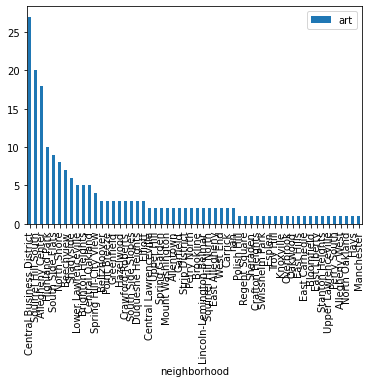

In [8]:
neighborhoodArt.plot(kind="bar")

Since it's very difficult to tell what's happening, let's look at just the top 15 neighborhoods and reformat it for better accessibility.

Text(0, 0.5, 'Instances of Public Art')

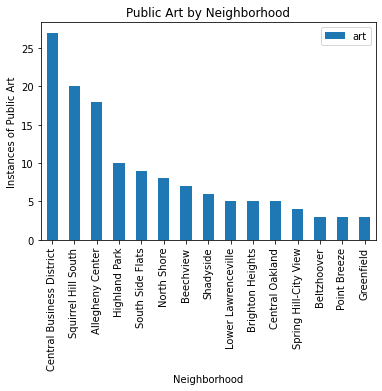

In [9]:
import matplotlib.pyplot as plt

artTop15 = neighborhoodArt.head(15)
artTop15.plot.bar(title="Public Art by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Instances of Public Art")

This chart now shows the top 15 neighborhoods, sorted by the instances of public art in descending order. From here, we see that 'Central Business District' has the most instances of art at 27 instances, 'Squirrel Hill South' is second at 20 instances, and 'Allegheny Center' follows in third at 18 instances of public art.

---
To see the density of artworks by neighborhood on a map, I follow the process outlined in the 'Data Visualization' lab.

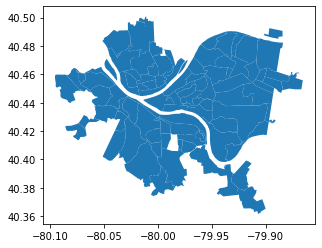

In [10]:
import geopandas

neighborhoodMap = geopandas.read_file("NeighborhoodMap/Neighborhoods_.shp") # read in the shapefile
neighborhoodMap.plot() # plot the geopandas dataframe

In [11]:
# merge
artMap = neighborhoodMap.merge(neighborhoodArt, how='left', left_on='hood', right_on='neighborhood')

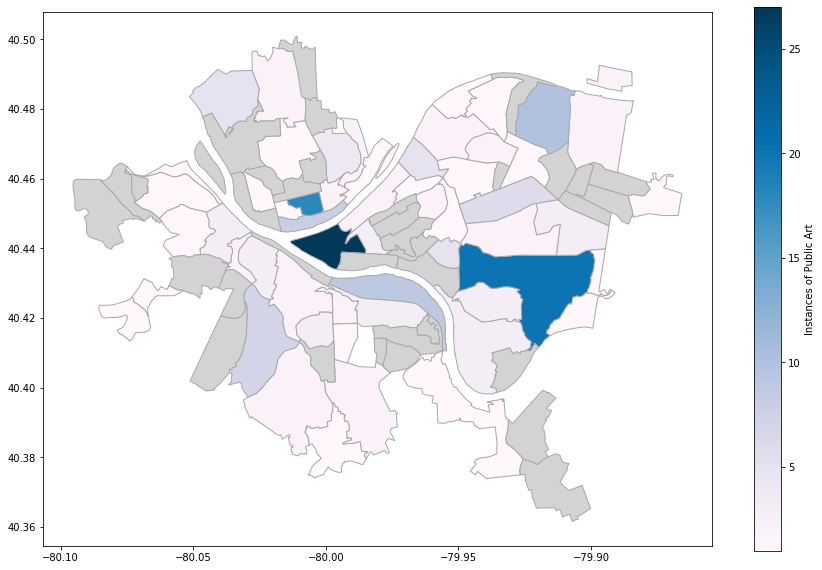

In [12]:
artMap.plot(column='art', # set the data to be used for coloring
            cmap='PuBu',              # choose a color palette
            edgecolor="darkgray",     # outline the districts in dark gray
            legend=True,              # show the legend
            legend_kwds={'label': "Instances of Public Art"}, # label the legend
            figsize=(15, 10),         # set the size
            missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
            )

**Public Art Conclusion**

---

Based on just the metric of quantity of public art in a neighborhood, it appears Central Business District (downtown), Squirrel Hill South, and Allegheny Center are the best neighborhoods within the city of Pittsburgh. Though many neighborhoods had a few art pieces here and there, these 3 had the most significant values based on both the bar chart and as seen on the color map. Further analysis on other metrics should be completed to come to an overall conclusion, but these 3 neighborhoods are substantial contenders for best neighborhood in Pittsburgh.

## Safety: Crime
---

**Links to datasets:**  
https://data.wprdc.org/dataset/uniform-crime-reporting-data  
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3  

In order to rank each neighborhood by their community, I decided to look at how calm a specific neighborhood is using the Police Blotter Archive. The amount of offenses in a given place typically correlates to how "safe" it feels. If someone living there feels safe and secure in their community, then they will be more comfortable interacting with one another.

### Crime Frequency Analysis
---

First, I import pandas and load in the crime data.

---

In [2]:
import pandas as pd

#Load crime data
crimeData = pd.read_csv("crime.tsv", index_col="_id", sep='\t')

#Display crime data
crimeData.head()

PK         CCR  HIERARCHY         INCIDENTTIME  \
_id                                                        
1    2802309  16000001.0         10  2016-01-01T00:00:00   
2    2803174  16004547.0         11  2016-01-01T00:01:00   
3    2801809  16000367.0          4  2016-01-01T00:10:00   
4    2802315  16000035.0         10  2016-01-01T00:15:00   
5    2802312  16000024.0          4  2016-01-01T00:16:00   

                                  INCIDENTLOCATION CLEAREDFLAG  \
_id                                                              
1    400 Block North Shore DR Pittsburgh, PA 15212           Y   
2      5400 Block Carnegie ST Pittsburgh, PA 15201           N   
3    500 Block Mt Pleasant RD Pittsburgh, PA 15214           N   
4           300 Block Wood ST Pittsburgh, PA 15222           Y   
5    500 Block Mt Pleasant RD Pittsburgh, PA 15214           N   

            INCIDENTNEIGHBORHOOD INCIDENTZONE  \
_id                                             
1                    North Shore            1   
2            Upper Lawrenceville            2   
3              Northview Heights            1   
4    Golden Triangle/Civic Arena            2   
5              Northview Heights            1   

                        INCIDENTHIERARCHYDESC  \
_id                                             
1              HARRASSMENT/THREAT/ATTEMPT/PHY   
2                          THEFT BY DECEPTION   
3     DISCHARGE OF FIREARM INTO OCC.STRUCTURE   
4              HARRASSMENT/THREAT/ATTEMPT/PHY   
5    PROP MISSILE INTO OCC VEHICLE/OR ROADWAY   

                                              OFFENSES  INCIDENTTRACT  \
_id                                                                     
1    2702 Aggravated Assault. / 2709(a) Harassment....         2205.0   
2                             3922 Theft by Deception.         1011.0   
3    2707.1 Discharge of a Firearm into Occupied St...         2609.0   
4          2709(a)(3) Harassment No Legitimate Purpose          201.0   
5    2705 Recklessy Endangering Another Person. / 3...         2609.0   

     COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION          X          Y  
_id                                                                 
1                 1.0                    6.0 -80.012337  40.446263  
2                 7.0                    2.0 -79.950295  40.482290  
3                 1.0                    1.0 -80.000966  40.478651  
4                 6.0                    6.0 -80.001251  40.438918  
5                 1.0                    1.0 -80.000966  40.478651

---
This dataset has far too many columns, I only need the offense and the neighborhood where the crime took place. Also, I removed any rows with a null value for accuracy.

---

In [3]:
#Drop the irrelevant columns and rows with a null value
filtCrime = crimeData[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]
filtCrime = filtCrime.dropna()

filtCrime.head()

INCIDENTNEIGHBORHOOD  \
_id                                
1                    North Shore   
2            Upper Lawrenceville   
3              Northview Heights   
4    Golden Triangle/Civic Arena   
5              Northview Heights   

                                              OFFENSES  
_id                                                     
1    2702 Aggravated Assault. / 2709(a) Harassment....  
2                             3922 Theft by Deception.  
3    2707.1 Discharge of a Firearm into Occupied St...  
4          2709(a)(3) Harassment No Legitimate Purpose  
5    2705 Recklessy Endangering Another Person. / 3...

---
This is great, but I now I need to know exactly how many offenses occurred in each neighborhood

---

In [4]:
#Count each offense by neighborhood
crimeFreq = filtCrime.groupby("INCIDENTNEIGHBORHOOD").count()

#Display the offenses in each neighbood
crimeFreq

OFFENSES
INCIDENTNEIGHBORHOOD          
Allegheny Center          3532
Allegheny West            1077
Allentown                 5164
Arlington                 2109
Arlington Heights          561
...                        ...
Upper Lawrenceville       1635
West End                  1247
West Oakland              1920
Westwood                  1606
Windgap                    872

[98 rows x 1 columns]

**Population**

---
Now that we have the amount of crimes in each neighborhood, we need to make sure that neighborhoods with very little population aren't unfairly seen as calmer while neighborhoods with a large population are seen as hotspots. In order to do this, I loaded in a new dataset with the population of every neighborhood. With this data, I can compare the crime incidences to the population in order to get ratios that we can then compare to each other.

---

In [5]:
#Load population data
popData = pd.read_csv("population.tsv", index_col="_id", sep='\t')
popData = popData[['Neighborhood', 'Estimate; Total']]

#Display the dataset
popData

Neighborhood  Estimate; Total
_id                                      
1       Allegheny Center           1411.0
2         Allegheny West            343.0
3              Allentown           2558.0
4              Arlington           1852.0
5      Arlington Heights            272.0
..                   ...              ...
87   Upper Lawrenceville           2754.0
88              West End            235.0
89          West Oakland           1717.0
90              Westwood           3537.0
91               Windgap           1534.0

[91 rows x 2 columns]

---
Now we can merge the two dataframes into one, removing any neighborhoods that aren't in either table. The population dataset's neighborhoods will be used as the crime dataset has duplicates.

---

In [6]:
#Merge the two dataframes, use 
popCrime = pd.merge(popData, crimeFreq, left_on='Neighborhood', right_index=True)

#Display merged dataset
popCrime

Neighborhood  Estimate; Total  OFFENSES
_id                                                
1       Allegheny Center           1411.0      3532
2         Allegheny West            343.0      1077
3              Allentown           2558.0      5164
4              Arlington           1852.0      2109
5      Arlington Heights            272.0       561
..                   ...              ...       ...
87   Upper Lawrenceville           2754.0      1635
88              West End            235.0      1247
89          West Oakland           1717.0      1920
90              Westwood           3537.0      1606
91               Windgap           1534.0       872

[89 rows x 3 columns]

---
Even with the ratio, we should still make sure that neighborhoods with very little people aren't counted. Let's remove any neighborhood with less than 500 people.

---

In [7]:
popCrime = popCrime[popCrime['Estimate; Total'] > 500]
popCrime

Neighborhood  Estimate; Total  OFFENSES
_id                                                
1       Allegheny Center           1411.0      3532
3              Allentown           2558.0      5164
4              Arlington           1852.0      2109
6             Banksville           3858.0      1749
7      Bedford Dwellings           1349.0      2600
..                   ...              ...       ...
86            Upper Hill           1884.0      1908
87   Upper Lawrenceville           2754.0      1635
89          West Oakland           1717.0      1920
90              Westwood           3537.0      1606
91               Windgap           1534.0       872

[79 rows x 3 columns]

---
Now we can find the ratio by iterating through the dataframe, finding the ratio, and creating a new dictionary to store the values.

---

In [8]:
#Create an empty dictionary
crimeRatio = dict()

#Iterate through the dataframe
for index, row in popCrime.iterrows():
    #Assign a new entry named the current neighborhood, set it equal to offenses/population
    crimeRatio[row['Neighborhood']] = row['OFFENSES'] / row['Estimate; Total']
    
#Convert dictionary to dataframe
graphingRatio = pd.DataFrame([crimeRatio], index = ['Ratio']).T
graphingRatio

Ratio
Allegheny Center     2.503189
Allentown            2.018765
Arlington            1.138769
Banksville           0.453344
Bedford Dwellings    1.927354
...                       ...
Upper Hill           1.012739
Upper Lawrenceville  0.593682
West Oakland         1.118229
Westwood             0.454057
Windgap              0.568449

[79 rows x 1 columns]

---
I then graphed the data I had been working with so far in order to get a feel for how to display the final results.

---

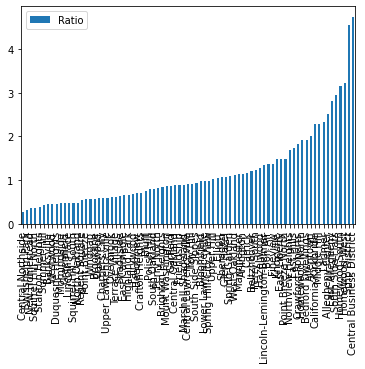

In [9]:
#Sort the values in ascending order and plot a bar graph
graphingRatio = graphingRatio.sort_values('Ratio', ascending=True)
graphingRatio.plot(kind='bar')

---
As you can see, this is very hard to read. Let's just take the top 10 neighborhoods with the least amount of crime incidences

---

Text(0, 0.5, 'Ratio')

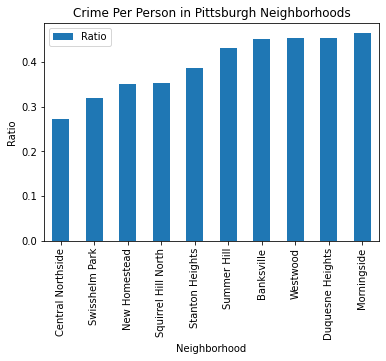

In [10]:
import matplotlib.pyplot as plt

#Crop to the best 10
bestCrime = graphingRatio.head(10)

#Plot the bar graph with labels
bestCrime.plot(kind='bar', title="Crime Per Person in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Ratio")

**Crime Frequency Conclusion**

---
So, according to this, the top three neighborhoods in Pittsburgh to live in when looking at relative safety are Central Northside, Swisshelm Park, and New Homestead.

---

## Environment/Accessibility: Parks
---

** parks introduction goes here

### Parks Analysis

---

# **Conclusion**
---

** The neighborhood that was seen the most and performed best across all 3 metrics was